# Neural network to Student dropout rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns




In [2]:
df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
# Assume for simplicity all features are categorical.
encoder.fit(X) 
# Apply the encoder.
X = encoder.transform(X)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# eta_vals = np.logspace(-5, 1, 7)
# lmbd_vals = np.logspace(-5, 1, 7)
# DNN_scikit = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
# epochs = 100
# n_hidden_neurons = (200)

# for i, eta in enumerate(eta_vals):
#     for j, lmbd in enumerate(lmbd_vals):
#         dnn = MLPClassifier(hidden_layer_sizes=n_hidden_neurons, activation='relu',
#                             alpha=lmbd, learning_rate_init=eta, max_iter=epochs)
#         dnn.fit(X_train, y_train)
        
#         DNN_scikit[i][j] = dnn
        
#         print("Learning rate  = ", eta)
#         print("Lambda = ", lmbd)
#         print("Accuracy score on test set: ", dnn.score(X_test, y_test))
#         print()


In [4]:
# # visual representation of grid search
# # uses seaborn heatmap, could probably do this in matplotlib
# import seaborn as sns

# sns.set()

# train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
# test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

# for i in range(len(eta_vals)):
#     for j in range(len(lmbd_vals)):
#         dnn = DNN_scikit[i][j]
        
#         train_pred = dnn.predict(X_train) 
#         test_pred = dnn.predict(X_test)

#         train_accuracy[i][j] = accuracy_score(y_train, train_pred)
#         test_accuracy[i][j] = accuracy_score(y_test, test_pred)

        
# fig, ax = plt.subplots(figsize = (10, 10))
# sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="Blues")
# ax.set_title("Training Accuracy")
# ax.set_ylabel("$\eta$")
# ax.set_xlabel("$\lambda$")
# plt.savefig('../Figures/nn_train_acc_lr_lmda.png', dpi=300, bbox_inches='tight')

# plt.show()

# fig, ax = plt.subplots(figsize = (10, 10))
# sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="Blues")
# ax.set_title("Test Accuracy")
# ax.set_ylabel("$\eta$")
# ax.set_xlabel("$\lambda$")
# plt.savefig('../Figures/nn_test_acc_lr_lmda.png', dpi=300, bbox_inches='tight')
# plt.show()


In [5]:
# print(eta_vals)
# print(lmbd_vals)

# print(test_accuracy[1][5])
# print(test_accuracy[2][5])



NameError: name 'eta_vals' is not defined

In [17]:
# eta = eta_vals[2]
# lmbd = lmbd_vals[5]
eta = 1.e-3
lmbd = 1.

epochs = 100
n_hidden_neurons = [100]


dnn = MLPClassifier(hidden_layer_sizes=n_hidden_neurons, activation='logistic',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs)
dnn.fit(X_train, y_train)

y_pred = dnn.predict(X_test)

/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


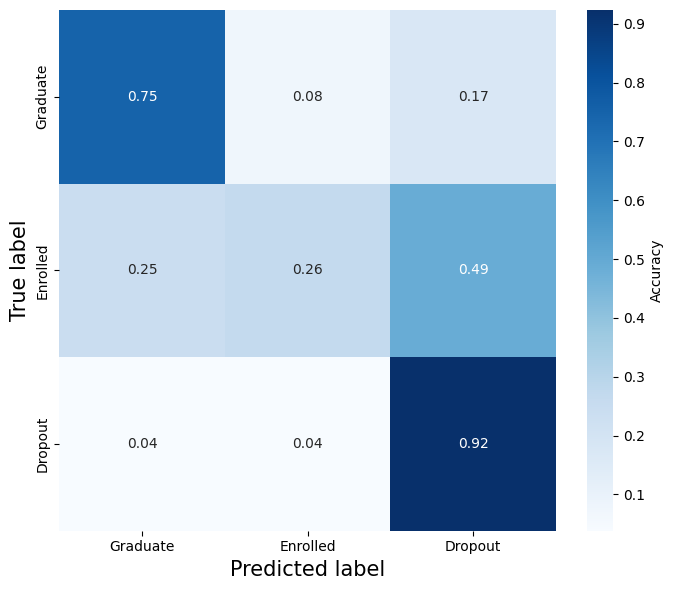

In [18]:

cm = confusion_matrix(y_test, y_pred)

target_names = ['Graduate', 'Enrolled', 'Dropout']

cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
plt.figure(figsize=(7, 6))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=target_names,
            yticklabels=target_names, cbar_kws={'label':'Accuracy'})
plt.xlabel("Predicted label", fontsize=15)
plt.ylabel("True label", fontsize=15)
plt.tight_layout()
#plt.savefig('../Figures/Fashion_MNIST_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


In [15]:
eta = 1.e-3
lmbd = 1.

epochs = 100
layer_no = [1,2, 3]
layer_sizes = [50,100,200,300]

DNN_scikit = np.zeros((len(layer_no), len(layer_sizes)), dtype=object)

train_accuracy = np.zeros((len(layer_no), len(layer_sizes)))
test_accuracy = np.zeros((len(layer_no), len(layer_sizes)))


for i in range(len(layer_no)):
    for j in range(len(layer_sizes)):
        n_hidden_neurons = [layer_sizes[j]] * layer_no[i]
        dnn = MLPClassifier(hidden_layer_sizes=n_hidden_neurons, activation='logistic',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs)
        dnn.fit(X_train, y_train)
        DNN_scikit[i][j] = dnn
        print("No hidden layers  = ", layer_no[i])
        print("Hidden layer size = ", layer_sizes[j])
        print("Accuracy score on test set: ", dnn.score(X_test, y_test))
        print()


/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  1
Hidden layer size =  50
Accuracy score on test set:  0.7480225988700565



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  1
Hidden layer size =  100
Accuracy score on test set:  0.752542372881356



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  1
Hidden layer size =  200
Accuracy score on test set:  0.7480225988700565

No hidden layers  =  1
Hidden layer size =  300
Accuracy score on test set:  0.7446327683615819



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  2
Hidden layer size =  50
Accuracy score on test set:  0.7344632768361582



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  2
Hidden layer size =  100
Accuracy score on test set:  0.7322033898305085



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  2
Hidden layer size =  200
Accuracy score on test set:  0.7344632768361582

No hidden layers  =  2
Hidden layer size =  300
Accuracy score on test set:  0.7299435028248588

No hidden layers  =  3
Hidden layer size =  50
Accuracy score on test set:  0.47231638418079097

No hidden layers  =  3
Hidden layer size =  100
Accuracy score on test set:  0.47231638418079097

No hidden layers  =  3
Hidden layer size =  200
Accuracy score on test set:  0.47231638418079097

No hidden layers  =  3
Hidden layer size =  300
Accuracy score on test set:  0.47231638418079097



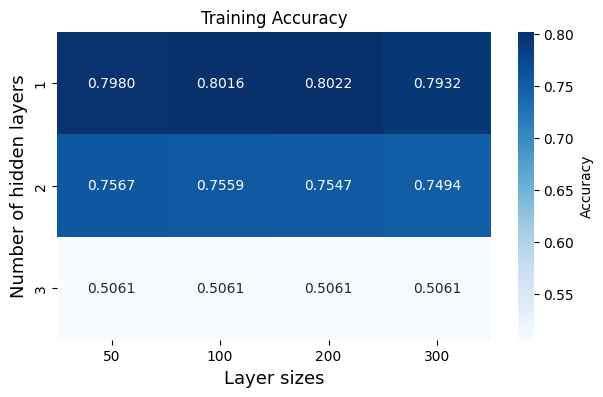

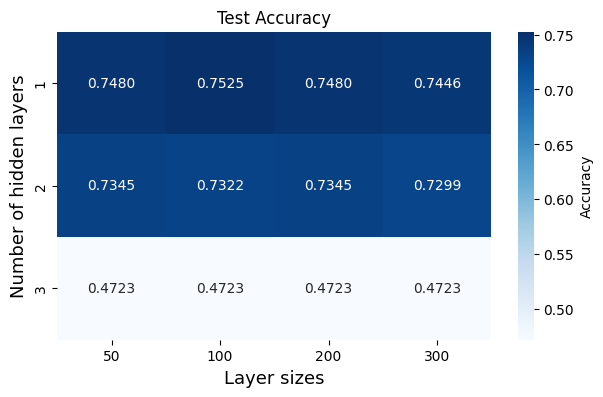

In [16]:
for i in range(len(layer_no)):
    for j in range(len(layer_sizes)):
        dnn = DNN_scikit[i][j]
        
        train_pred = dnn.predict(X_train) 
        test_pred = dnn.predict(X_test)

        train_accuracy[i][j] = accuracy_score(y_train, train_pred)
        test_accuracy[i][j] = accuracy_score(y_test, test_pred)

plt.figure(figsize=(7,4))
ax = sns.heatmap( train_accuracy, cmap='Blues', annot=True, fmt='.4f',
                 xticklabels=layer_sizes, yticklabels=layer_no, cbar=True, cbar_kws={'label':'Accuracy'} )
ax.set_title("Training Accuracy")
ax.set_xlabel("Layer sizes", fontsize=13)
ax.set_ylabel("Number of hidden layers", fontsize=13)
# plt.savefig('../Figures/nn_train_acc_lr_lmda.png', dpi=300, bbox_inches='tight')

plt.show()

plt.figure(figsize=(7,4))
ax = sns.heatmap(test_accuracy, cmap='Blues', annot=True, fmt='.4f',
                 xticklabels=layer_sizes, yticklabels=layer_no, cbar=True, cbar_kws={'label':'Accuracy'} )
ax.set_title("Test Accuracy")
ax.set_xlabel("Layer sizes", fontsize=13)
ax.set_ylabel("Number of hidden layers", fontsize=13)
# plt.savefig('../Figures/nn_test_acc_lr_lmda.png', dpi=300, bbox_inches='tight')
plt.show()